## p2z Performance Analysis
This Jupyter Notebook is designed to parse TAU data and construct different visualizations from that data. The notebook also calculates derived metrics such as L2 and L3 cache miss rate and constructs performance graphs. It also calculates vector flops from native counters such FP_ARITH 128B, FP_ARITH 256B, and FP_ARITH 512B.

In [1]:
import os
from tau_parser import TauProfileParser
from visualizations import Visualization

## Parsing the profile files
To parse the profile files, the path to the profile files has to be provided. At this moment, we have collected data for 4 versions (OpenMP, TBB, Eigen, Kokkos) and for 2 compilers (gcc, icc). Each hardware counter has its own folder in the path provided. Knowing the order in which the profile files are stored for each counter is important in parsing it. The profile files for each counter are stored in the following manner:
- Folder 0 and 1 contain the data for OpenMP GCC and ICC respectively
- Folder 2 and 3 contain the data for TBB GCC and ICC respectively
- Folder 4 and 5 contain the data for Eigen GCC and ICC respectively
- Folder 6 and 7 contain the data for Kokkos GCC and ICC respectively

The code reads each folder from 0 to 7 and stores the parsed data in a single csv file for further processing. 

In [2]:
# number of threads on which the experiments were conducted
nthreads = 40
# path to the profile files
path = "/home/hammad/Desktop/UO/Research/all_versions_analysis/Counters/"
# name of the function for which data is being collected
function_name='propagateToZ'

# Create folders to store parsed data and the graphs
if not os.path.exists('Parsed Data'):
    os.makedirs('Parsed Data')
if not os.path.exists('Graphs'):
    os.makedirs('Graphs')

## Visualizing the data

### Visualizing the store instructions

File already exists


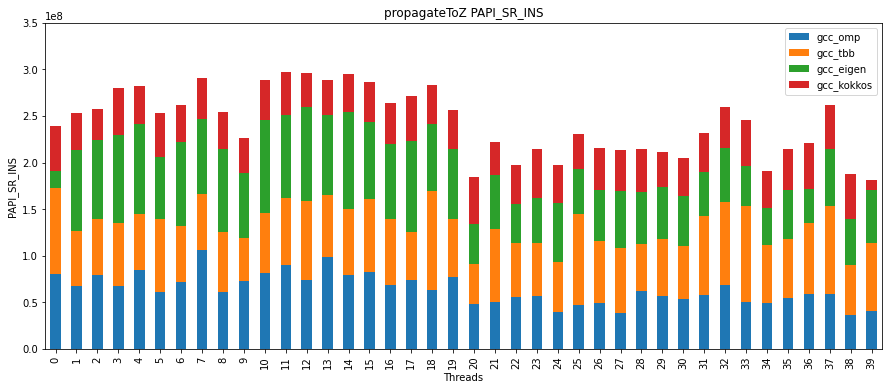

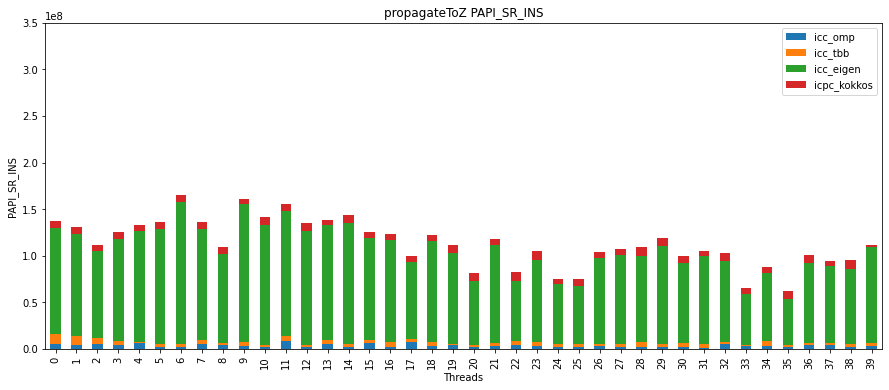

In [11]:
# Pass nthreads, path, function_name to the Visualization object constructor
visualization_object = Visualization(nthreads, path, function_name)

# Specify the hardware counter
hardware_counter = 'PAPI_SR_INS'

# Specify some graph settings like the scale of the graph, the compilers for which we want the graph, and the chart type
graph_type = ['gcc', 'icc']
scale = 350000000
chart_type = 'bar'

visualization_object.create_visualization(hardware_counter, graph_type, scale, chart_type)

### Insights
We can gather following insights from the graphs above:
1. GCC compiler has more store instructions than the icc version
2. GCC Kokkos has the least amount of store instructions as compared to GCC OpenMP, TBB, and Eigen
3. For the icc compiler, icc eigen has the most amount of store instructions as compared to the other versions 

### Visualizing the load instructions

File already exists


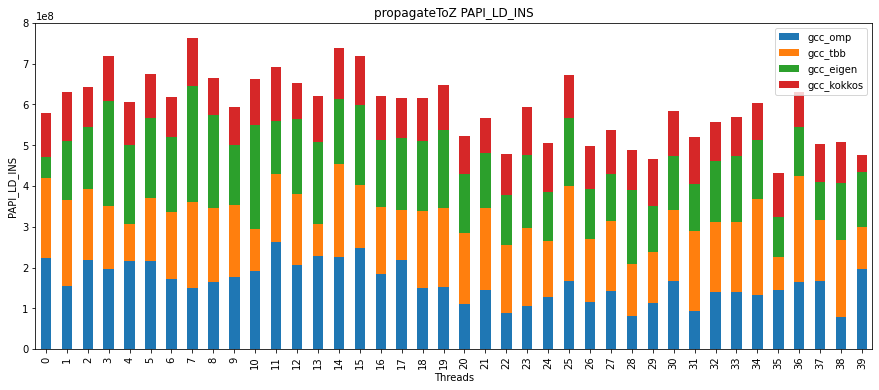

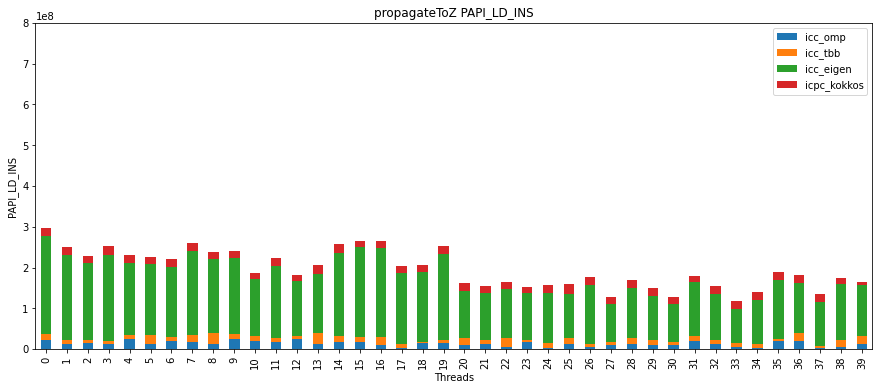

In [4]:
# Pass nthreads, path, function_name to the Visualization object constructor
visualization_object = Visualization(nthreads, path, function_name)

# Specify the hardware counter
hardware_counter = 'PAPI_LD_INS'

# Specify some graph settings like the scale of the graph, the compilers for which we want the graph, and the chart type
graph_type = ['gcc', 'icc']
scale = 800000000
chart_type = 'bar'

visualization_object.create_visualization(hardware_counter, graph_type, scale, chart_type)

### Insights
Similar insights can be gathered for load instructions
1. As compared to store instrucitons, both the compilers perform more load instructions as compared to the store instructions
2. GCC compiler has more load instructions than the icc version
3. GCC Kokkos has the least amount of load instructions as compared to GCC OpenMP, TBB, and Eigen
4. For the icc compiler, icc eigen has the most amount of load instructions as compared to the other versions 

### Visualizing scalar floating point operations (flops)

File already exists


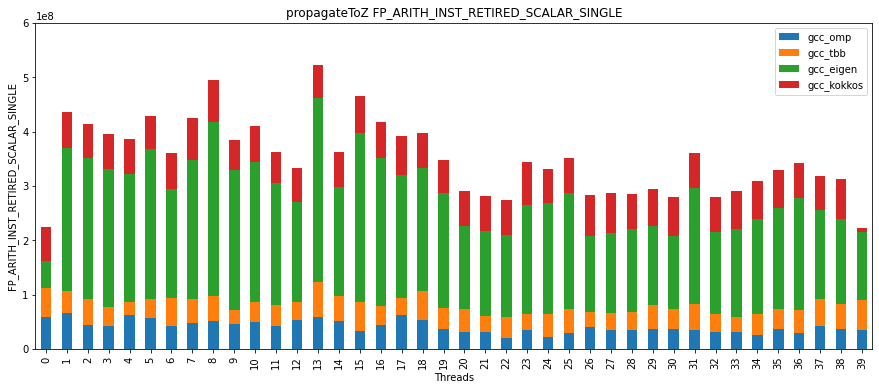

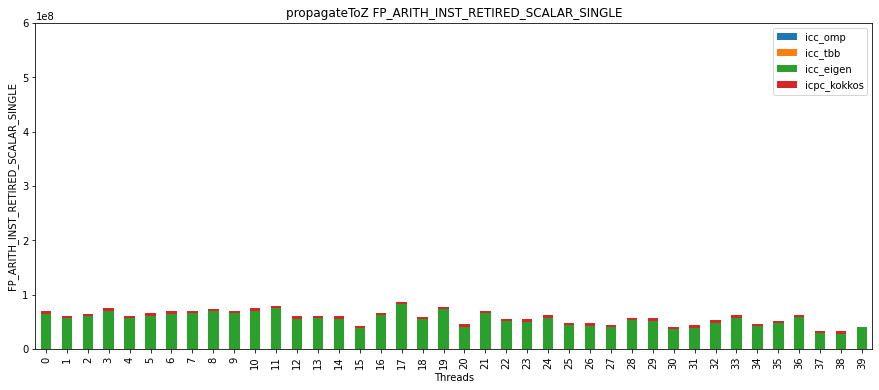

In [5]:
# Pass nthreads, path, function_name to the Visualization object constructor
visualization_object = Visualization(nthreads, path, function_name)

# Specify the hardware counter
hardware_counter = 'FP_ARITH_INST_RETIRED_SCALAR_SINGLE'

# Specify some graph settings like the scale of the graph, the compilers for which we want the graph, and the chart type
graph_type = ['gcc', 'icc']
scale = 600000000
chart_type = 'bar'

visualization_object.create_visualization(hardware_counter, graph_type, scale, chart_type)

### Insights
From the graphs above, we can gather the following insights:
1. GCC compiler has more number of scalar flops as compared to icc compiler
2. GCC eigen and icc eigen have the highest number of scalar flops
3. OMP and TBB have the lowest number of scalar flops for both gcc and icc compilers.
4. Kokkos has a considerable number of scalar flops for gcc compiler but the number drops for icc compiler

## Visualizing vector floating point operations (flops)
To calculate vector flops, first the data for the different native counters is parsed. These counters include:
- FP_ARITH_INST_RETIRED_128B_PACKED_SINGLE
- FP_ARITH_INST_RETIRED_256B_PACKED_SINGLE
- FP_ARITH_INST_RETIRED_512B_PACKED_SINGLE

128B values are multiplied by 4, 256B values are mutliplied by 8, and 512B values are multiplied by 16. The result is summed up to calculate the vector flops for that specific thread.

File already exists
File already exists
File already exists


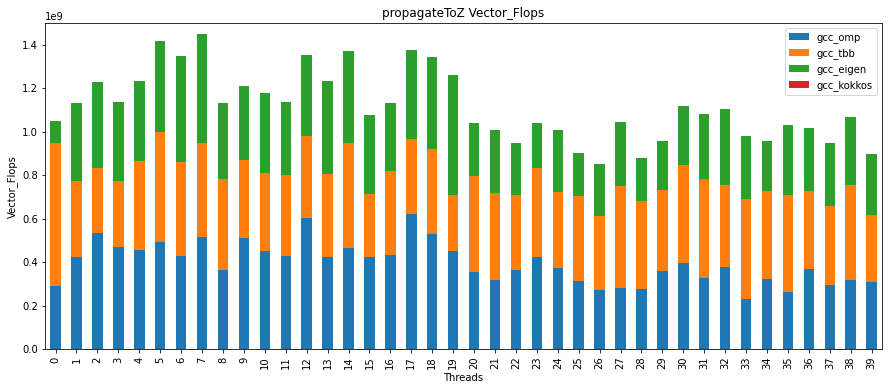

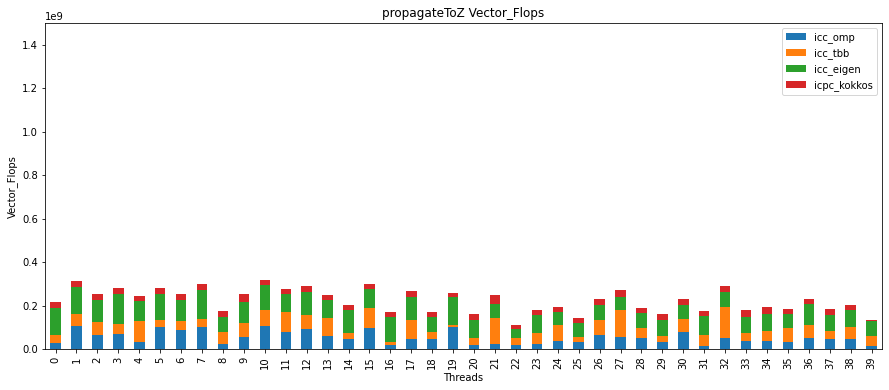

In [9]:
# Pass nthreads, path, function_name to the Visualization object constructor
visualization_object = Visualization(nthreads, path, function_name)

# Specify the 128B_hardware_counter, 256B_hardware_counter, and 512B_hardware_counter
fp_128B_hardware_counter = 'FP_ARITH_INST_RETIRED_128B_PACKED_SINGLE'
fp_256B_hardware_counter = 'FP_ARITH_INST_RETIRED_256B_PACKED_SINGLE'
fp_512B_hardware_counter = 'FP_ARITH_INST_RETIRED_512B_PACKED_SINGLE'

# Specify some graph settings like the scale of the graph, the compilers for which we want the graph, and the chart type
graph_type = ['gcc', 'icc']
scale = 1500000000
chart_type = 'bar'

visualization_object.create_visualization_vector_flops(fp_128B_hardware_counter, fp_256B_hardware_counter, fp_512B_hardware_counter, graph_type, scale, chart_type)

### Insights
From the graphs above, we can gather the following insights: 
1. GCC compiler has more number of vector flops as compared to icc compiler
2. OMP, TBB, and Eigen are better vectorized than Kokkos for both gcc and icc compilers
3. Kokkos has fairly low vector flops for both gcc and icc compilers

## Visualizing Cache Miss Rate
To visualize cache miss rate, cache access and miss data is parsed and analyzed first. From that data, miss rate is calculated and saved in a csv. The csv is further used to construct different types of visualizations

File already exists
File already exists


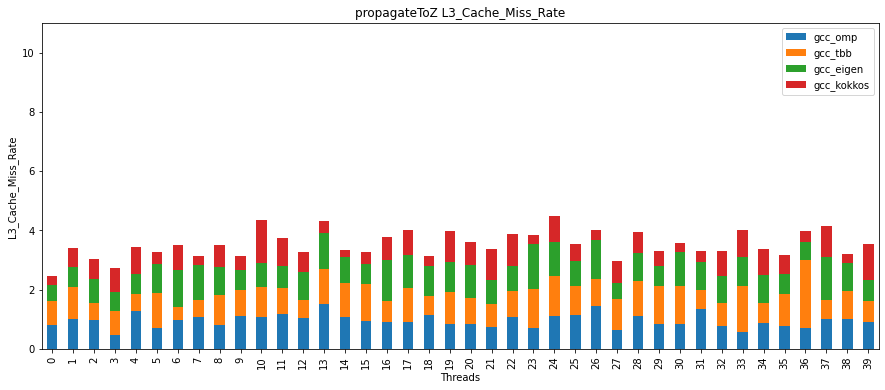

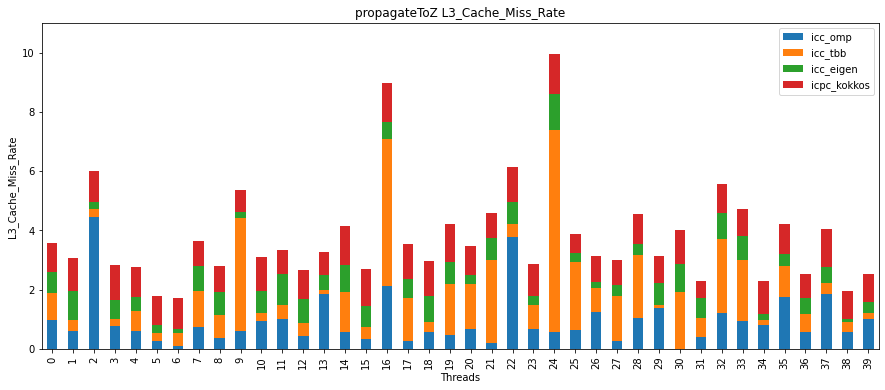

In [12]:
# Pass nthreads, path, function_name to the Visualization object constructor
visualization_object = Visualization(nthreads, path, function_name)

# Specify the cache miss and access counter. Also specify the level of cache for which the miss rate is being calculated
cache_miss_hardware_counter = 'PAPI_L3_TCM'
cache_access_hardware_counter = 'PAPI_L3_TCA'
miss_rate = 'L3_Cache_Miss_Rate'

# Specify some graph settings like the scale of the graph, the compilers for which we want the graph, and the chart type
graph_type = ['gcc', 'icc']
scale = 11
chart_type = 'bar'

visualization_object.create_visualization_miss_rate(cache_miss_hardware_counter, cache_access_hardware_counter, miss_rate, graph_type, scale, chart_type)

### Insights